In [5]:
from tensorflow import keras
import matplotlib.pyplot as plt

In [6]:
mnist_dataset = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist_dataset.load_data()


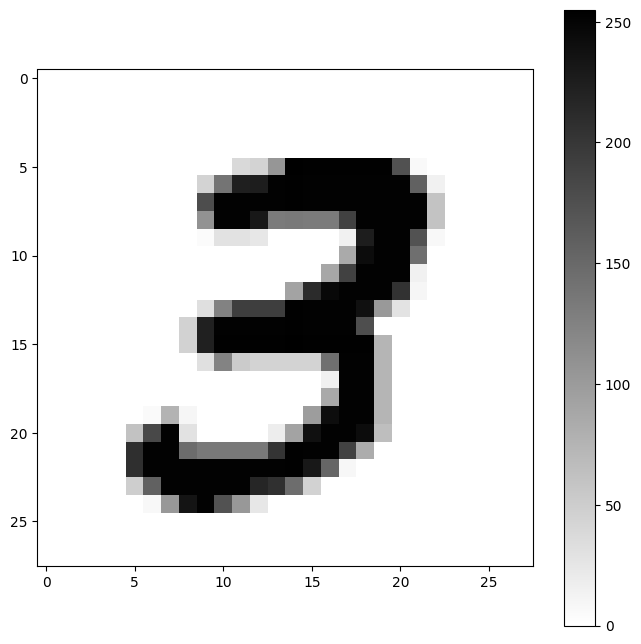

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(X_train[7], cmap=plt.cm.binary)
plt.colorbar()
plt.show()


In [11]:

X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0




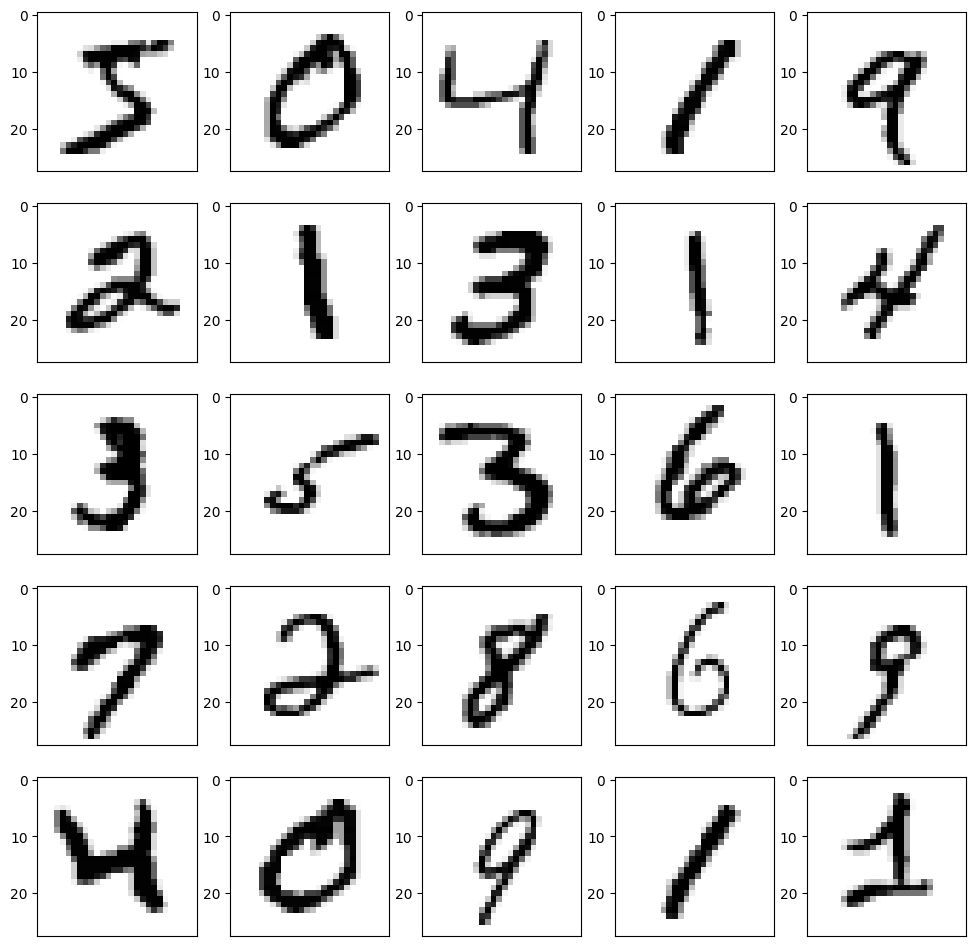

In [12]:
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5, 5, i+1) # Define figure layout
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xticks([])
plt.show()

In [14]:
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [15]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, add

nn_model = Sequential()
nn_model.add(Flatten(input_shape=(28, 28)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
from tensorflow.keras.layers import Dense
#Funkcja aktywacji
nn_model.add(Dense(128,activation='relu'))


In [18]:
# Funkcja wyjsciowa

nn_model.add(Dense(10,activation='softmax'))

In [23]:
nn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [24]:
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
training_eopchs_data = nn_model.fit(X_train,y_train,epochs=30,validation_split=0.15,batch_size=256)

Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3362 - loss: 2.2385 - val_accuracy: 0.6341 - val_loss: 1.8351
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6554 - loss: 1.6652 - val_accuracy: 0.7714 - val_loss: 1.1774
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7647 - loss: 1.1053 - val_accuracy: 0.8296 - val_loss: 0.8314
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8156 - loss: 0.8205 - val_accuracy: 0.8566 - val_loss: 0.6501
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8438 - loss: 0.6563 - val_accuracy: 0.8738 - val_loss: 0.5407
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8618 - loss: 0.5630 - val_accuracy: 0.8859 - val_loss: 0.4716
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8743 - loss: 0.5028 - val_accuracy: 0.8933 - val_loss: 0.4242
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8823 - loss: 0.4624 - val_accuracy: 0

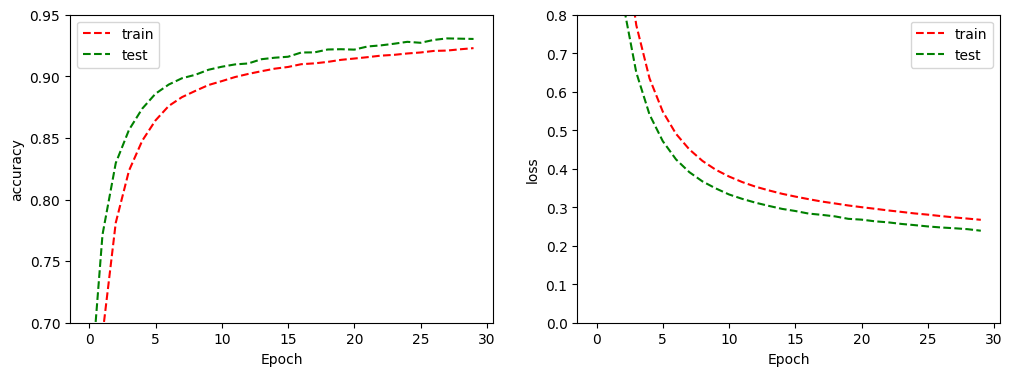

In [26]:

# Plot metric and loss for every epoch (both training and test set)
def draw_curves(data, metric_name="accuracy", y_lim_metric=(0.8, 1.00),
                loss_name="loss", y_lim_loss=(0.0, 1.0)):

    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(data.history[metric_name], "r--")
    plt.plot(data.history["val_" + metric_name], "g--")
    plt.ylabel(metric_name)
    plt.xlabel("Epoch")
    plt.ylim(y_lim_metric)
    plt.legend(["train", "test"], loc="best")

    plt.subplot(1, 2, 2)
    plt.plot(data.history[loss_name], "r--")
    plt.plot(data.history["val_" + loss_name], "g--")
    plt.ylabel(loss_name)
    plt.xlabel("Epoch")
    plt.ylim(y_lim_loss)
    plt.legend(["train", "test"], loc="best")

    plt.show()

draw_curves(training_eopchs_data, metric_name="accuracy", y_lim_metric=(0.7, 0.95),
            loss_name="loss", y_lim_loss=(0.0, 0.8))


In [31]:
y_pred = nn_model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[4.0033199e-05, 2.0543874e-08, 6.5811066e-05, ..., 9.9777240e-01,
        6.0646989e-06, 6.8885891e-04],
       [2.9422680e-03, 5.9742259e-05, 9.8534513e-01, ..., 1.2755342e-09,
        8.4133551e-04, 7.0894339e-09],
       [1.0071382e-05, 9.7839671e-01, 9.0639377e-03, ..., 3.9352565e-03,
        2.6002582e-03, 5.6204718e-04],
       ...,
       [6.6007914e-07, 2.6454761e-06, 3.4628036e-05, ..., 1.3988049e-03,
        1.0090826e-02, 5.3955089e-02],
       [2.3156739e-04, 9.2524147e-05, 1.1954978e-05, ..., 3.6317851e-06,
        9.2846781e-02, 2.4706527e-05],
       [9.8762168e-05, 4.5530082e-10, 2.4365808e-04, ..., 1.2998647e-09,
        3.5018932e-06, 1.2164989e-07]], dtype=float32)

In [30]:

loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9157 - loss: 0.2924
Loss: 0.25819841027259827
Accuracy: 0.9259999990463257


In [44]:
index = 0
actual_label = y_test[index].argmax()
predicted_label = y_pred[index].argmax()

In [47]:
import tensorflow as tf
print(f"Rzeczywista etykieta: {actual_label}")
print(f"Predykcja modelu: {predicted_label}")

Rzeczywista etykieta: 7
Predykcja modelu: 7


Rzeczywista etykieta: 7
Predykcja modelu: 7
Prawdopodobieństwa predykcji: [4.0033199e-05 2.0543874e-08 6.5811066e-05 1.4063742e-03 3.9430358e-07
 2.0025011e-05 1.8112579e-09 9.9777240e-01 6.0646989e-06 6.8885891e-04]


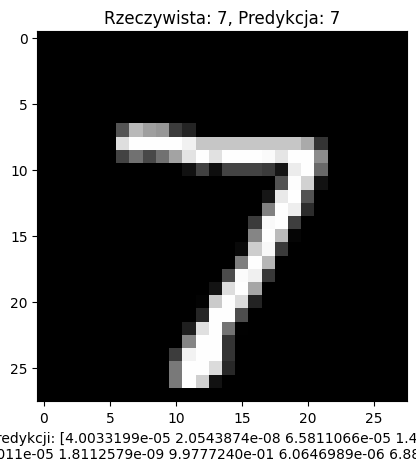

In [51]:
print(f"Rzeczywista etykieta: {actual_label}")
print(f"Predykcja modelu: {predicted_label}")
print(f"Prawdopodobieństwa predykcji: {y_pred[index]}")

# Zwizualizowanie obrazka z rzeczywistą etykietą i predykcją modelu
plt.imshow(X_test[index], cmap='gray')
plt.title(f"Rzeczywista: {actual_label}, Predykcja: {predicted_label}")
plt.xlabel(f'Prawdopodobieństwa predykcji: {y_pred[index]}')
plt.show()